In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#from importlib import reload
#if is_changed(gdrive.MyDrive.proyecto.model):
 #   from gdrive.MyDrive.proyecto.model import Q_Model

In [ ]:

from gdrive.MyDrive.proyecto.sequence_generator import Single_Signal_Generator
from gdrive.MyDrive.proyecto.emulator import Market
from gdrive.MyDrive.proyecto.model import Q_Model
from gdrive.MyDrive.proyecto.agent import Agent
from gdrive.MyDrive.proyecto.simulator import Simulator


In [ ]:
def load( filename):
        loaded_signals = np.load(filename)
        loaded = True
        no_of_loaded_signals = loaded_signals.shape[0]

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv (r'/content/gdrive/MyDrive/proyecto/data/SQM-B.SN5.csv')
n=df[:]['Close']
#print(df)
filename = "/content/gdrive/MyDrive/proyecto/data/senal.npy"
np.save(filename, n)


In [ ]:
#sampler = Single_Signal_Generator(total_timesteps=180, period_range=(10, 40), amplitude_range=(5, 80), noise_amplitude_ratio=0.5)
#filename = "Generated Signals.npy"
#sampler.build_signals(filename, 1000)
sampler= load(filename)

env = Market(sampler=sampler, last_n_timesteps=40, buy_cost=3.3)




AttributeError: ignored

hola

In [ ]:


dense_model = [
    {"type":"Reshape", "target_shape":(env.get_state().shape[0]*env.get_state().shape[1],)},
    {"type":"Dense", "units":16},
    {"type":"Dense", "units":16},
    {"type":"Dense", "units":16},
    {"type":"Dense", "units":16}
]
conv_model = [
    {"type":"Reshape", "target_shape":env.get_state().shape},
    {"type":"Conv1D", "filters":16, "kernel_size":3, "activation":"relu"},
    {"type":"Conv1D", "filters":16, "kernel_size":3, "activation":"relu"},
    {"type":"Flatten"},
    {"type":"Dense", "units":48, "activation":"relu"},
    {"type":"Dense", "units":24, "activation":"relu"}
]
gru_model = [
    {"type":"Reshape", "target_shape":env.get_state().shape},
    {"type":"GRU", "units":16, "return_sequences":True},
    {"type":"GRU", "units":16, "return_sequences":True},
    {"type":"GRU", "units":16, "return_sequences":False},
    {"type":"Dense", "units":16, "activation":"relu"},
    {"type":"Dense", "units":16, "activation":"relu"}
]
lstm_model = [
    {"type":"Reshape", "target_shape":env.get_state().shape},
    {"type":"LSTM", "units":16, "return_sequences":True},
    {"type":"LSTM", "units":16, "return_sequences":False},
    {"type":"Dense", "units":16, "activation":"relu"},
    {"type":"Dense", "units":16, "activation":"relu"}
]



In [ ]:
!pip install --upgrade gupload

from pydrive.auth import GoogleAuth
from google.colab import auth

# Authenticate and create the PyDrive client.
auth.authenticate_user()

Requirement already up-to-date: gupload in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [ ]:
q_model = Q_Model("Dense", state_dim=env.get_state().shape, no_of_actions=env.no_of_actions, layers=dense_model, hyperparameters={"lr":0.0001})
agent = Agent(q_model, batch_size=8, discount_factor=0.8, epsilon=1)

no_of_episodes_train = 100
no_of_episodes_test  = 100

sim = Simulator(env, agent)



  0%|          | 0/100 [00:00<?, ?it/s]

------------------------------------------------------------
Training
------------------------------------------------------------



100%|██████████| 100/100 [4:05:12<00:00, 147.12s/it]


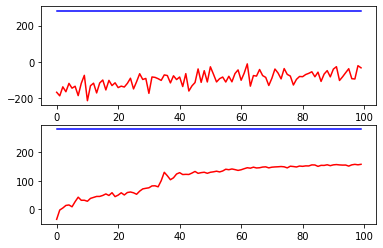

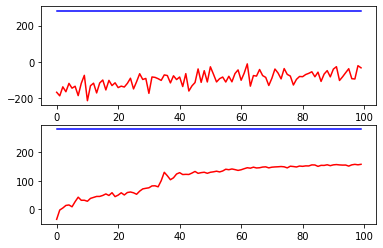

In [ ]:
sim.train(no_of_episodes_train, epsilon_decay=0.997)


In [ ]:
from keras.models import load_model
model = load_model("/content/gdrive/MyDrive/proyecto/models/gru at 2021-02-14/model.h5")


  0%|          | 0/100 [00:00<?, ?it/s]

------------------------------------------------------------
Testing
------------------------------------------------------------



100%|██████████| 100/100 [09:18<00:00,  5.58s/it]


------------------------------------------------------------
Mean Reward: 158.19032726941782
Mean Max Reward: 281.03593637411143
Positive Reward Percentage: 1.0
------------------------------------------------------------


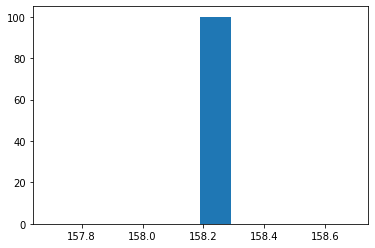

In [ ]:
agent.model.save()
sim.test(no_of_episodes_test)


In [ ]:
# librerias
import os
import shutil
# Configuracion general
OUTPUT_FOLDER='models'
GOOGLE_DRIVE_CODIGO_CARPETA_OUTPUT_MODELOS = '1F-eu-muFSZSKiWFU0vMHhD2Xi8ApBEdR'



MODELO_INICIO_FILENAME = 'model.h5'
# Ejecucion modelo
## Nombre modelo
model_name= agent.model.folder.split('/')[-1]
## Renombrar archivo modelo
ruta_modelo_inicio = f'{OUTPUT_FOLDER}/{model_name}/{MODELO_INICIO_FILENAME}'
ruta_modelo_destino = f'{OUTPUT_FOLDER}/{model_name}/{model_name}.h5'
try:
    shutil.move(ruta_modelo_inicio, ruta_modelo_destino)
except FileNotFoundError:
    shutil.move(ruta_modelo_destino, ruta_modelo_inicio)
    shutil.move(ruta_modelo_inicio, ruta_modelo_destino)
## Subir al drive
os.system(f'gupload --to {GOOGLE_DRIVE_CODIGO_CARPETA_OUTPUT_MODELOS} {ruta_modelo_destino}')

0

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
model_name

'conv_2021-02-15_15-06-00'